In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

/Users/chiqun/miniconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/chiqun/miniconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
INPUT_DIM = 1
HIDDEN_LAYER_WIDTH = 5
OUTPUT_DIM = 1
CONFIDENCE = 1
EPOCHS = 100000
DISPLAY_INTERVAL = 5000
LEARNING_RATE = 0.0001

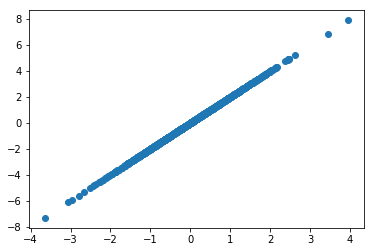

In [3]:
x_train_labelled = np.random.randn(1000,INPUT_DIM)
x_train_comp1 = np.random.randn(2000,INPUT_DIM)
x_train_comp2 = np.random.randn(2000,INPUT_DIM)
y_train_labelled = 2*x_train_labelled
y_train_comp = 2*x_train_comp1 - (2*x_train_comp2)
y_train_comp[y_train_comp<=0] = 0
y_train_comp[y_train_comp>0] = 1

plt.scatter(x_train_labelled, y_train_labelled)

In [4]:
initializer = tf.keras.initializers.glorot_uniform()

In [5]:
W1 = tf.Variable(initializer([INPUT_DIM, HIDDEN_LAYER_WIDTH]))

In [6]:
b1 = tf.Variable(tf.zeros([HIDDEN_LAYER_WIDTH]))

In [7]:
W2 = tf.Variable(initializer([HIDDEN_LAYER_WIDTH, OUTPUT_DIM]))
b2 = tf.Variable(tf.zeros([OUTPUT_DIM]))

In [8]:
X_labelled = tf.placeholder(tf.float32, [None, INPUT_DIM])
Y_labelled = tf.placeholder(tf.float32)
X_comp1 = tf.placeholder(tf.float32, [None, INPUT_DIM])
X_comp2 = tf.placeholder(tf.float32, [None, INPUT_DIM])
Y_comp = tf.placeholder(tf.float32)

In [9]:
hidden_layer_labelled = tf.add(tf.matmul(X_labelled, W1), b1)
hidden_layer_labelled = tf.nn.relu(hidden_layer_labelled)
output_layer_labelled = tf.add(tf.matmul(hidden_layer_labelled, W2), b2)
# output_layer_labelled = tf.nn.relu(output_layer_labelled)

In [10]:
loss_labelled = tf.reduce_mean(tf.squared_difference(output_layer_labelled, Y_labelled), name='mse_labelled')

In [11]:
hidden_layer_comp1 = tf.add(tf.matmul(X_comp1, W1), b1)
hidden_layer_comp1 = tf.nn.relu(hidden_layer_comp1)
output_layer_comp1 = tf.add(tf.matmul(hidden_layer_comp1, W2), b2)
# output_layer_comp1 = tf.nn.relu(output_layer_comp1)

In [12]:
hidden_layer_comp2 = tf.add(tf.matmul(X_comp2, W1), b1)
hidden_layer_comp2 = tf.nn.relu(hidden_layer_comp2)
output_layer_comp2 = tf.add(tf.matmul(hidden_layer_comp2, W2), b2)
# output_layer_comp2 = tf.nn.relu(output_layer_comp2)

In [13]:
output_layer_subtract = tf.subtract(output_layer_comp1, output_layer_comp2)

In [14]:
output_comp = tf.cast(tf.greater(output_layer_subtract, 0), tf.float32)

In [15]:
loss_comp = tf.reduce_mean(tf.squared_difference(output_comp, Y_comp), name='mse_comp')

In [16]:
loss = tf.add(loss_labelled, CONFIDENCE * loss_comp)

In [17]:
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(EPOCHS):
        sess.run(optimizer, feed_dict={X_labelled: x_train_labelled, 
                                       Y_labelled: y_train_labelled,
                                       X_comp1: x_train_comp1,
                                       X_comp2: x_train_comp2,
                                       Y_comp: y_train_comp})

        # Display logs per epoch step
        if (epoch+1) % DISPLAY_INTERVAL == 0:
            c = sess.run(loss, feed_dict={X_labelled: x_train_labelled, 
                                          Y_labelled: y_train_labelled,
                                          X_comp1: x_train_comp1,
                                          X_comp2: x_train_comp2,
                                          Y_comp: y_train_comp})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    y_pred = sess.run(output_layer_labelled, feed_dict={X_labelled: x_train_labelled})

Epoch: 5000 cost= 0.072757766
Epoch: 10000 cost= 0.032413028
Epoch: 15000 cost= 0.024592193
Epoch: 20000 cost= 0.018546026
Epoch: 25000 cost= 0.013713369
Epoch: 30000 cost= 0.009850517
Epoch: 35000 cost= 0.006889305
Epoch: 40000 cost= 0.004687286
Epoch: 45000 cost= 0.003122829
Epoch: 50000 cost= 0.002040026
Epoch: 55000 cost= 0.001329134
Epoch: 60000 cost= 0.000873383
Epoch: 65000 cost= 0.000584495
Epoch: 70000 cost= 0.000402369
Epoch: 75000 cost= 0.000289719
Epoch: 80000 cost= 0.000217995
Epoch: 85000 cost= 0.000172005
Epoch: 90000 cost= 0.000141630
Epoch: 95000 cost= 0.000122473
Epoch: 100000 cost= 0.000108709


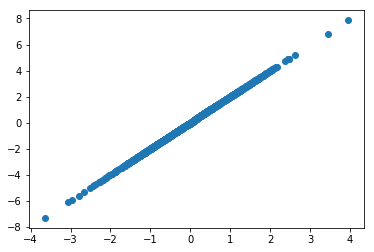

In [26]:
plt.scatter(x_train_labelled, y_pred)